In [34]:
import numpy as np
import matplotlib.pyplot as plt
np.arange(5)

array([0, 1, 2, 3, 4])

In [3]:
a = np.random.randn(8,3*3)
a

array([[ 0.22516844,  1.28830052,  1.72097271,  0.17954346,  2.05729989,
         0.74383133,  0.25645149,  0.89255684,  1.04113565],
       [-1.05511034,  0.04960024,  0.68280581,  1.51336349, -0.99649038,
        -0.55638138, -0.26590402,  1.96991883, -0.40841671],
       [ 0.69564246,  0.31596125, -0.64549711,  0.17982319,  0.20346104,
        -0.44592071,  0.98099995, -0.17506563,  0.76594539],
       [-1.75855501,  0.37988754, -0.90674289,  0.10167282,  1.12812565,
        -0.20091564,  1.25247799,  0.28353484, -0.31620708],
       [-0.78084491,  1.69365077,  1.44186307, -0.98209659, -0.77888755,
        -0.36161151, -0.54008424, -1.46565002, -0.36491138],
       [ 0.02510609,  0.67552932, -0.66633798, -0.06712218, -0.34831336,
         0.42902067, -0.20836536,  0.54772296, -2.30425167],
       [-0.27061822,  0.03745434, -0.90863358,  0.98107182,  0.5174788 ,
        -0.5867118 ,  0.28437349,  0.97497123, -1.20306514],
       [ 0.38352568, -0.69601447,  0.46759569,  0.03450009, -0

In [4]:
def plot(func,title, x = np.linspace(-10,10,100)):
    fig,ax = plt.subplots()
    ax.plot(x,func(x))
    ax.grid()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data',0)) #установка положения оси 0x
    ax.spines['left'].set_position(('data',0)) #установка положения оси 0y
    plt.title(title)
    plt.show()

## Activation function

1. ReLU 

$$ f(z)=max(0, z) $$
$$f'(z)\begin{cases}
    0, &z <= 0\\
    1, &z > 0
\end{cases}
$$

In [5]:
def ReLU(z:np.ndarray) -> np.ndarray:
    return np.maximum(0,z)
def dReLU(z:np.ndarray) -> np.ndarray:
    return (z > 0).astype("int8")

In [6]:
ReLU(a)

array([[0.22516844, 1.28830052, 1.72097271, 0.17954346, 2.05729989,
        0.74383133, 0.25645149, 0.89255684, 1.04113565],
       [0.        , 0.04960024, 0.68280581, 1.51336349, 0.        ,
        0.        , 0.        , 1.96991883, 0.        ],
       [0.69564246, 0.31596125, 0.        , 0.17982319, 0.20346104,
        0.        , 0.98099995, 0.        , 0.76594539],
       [0.        , 0.37988754, 0.        , 0.10167282, 1.12812565,
        0.        , 1.25247799, 0.28353484, 0.        ],
       [0.        , 1.69365077, 1.44186307, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.02510609, 0.67552932, 0.        , 0.        , 0.        ,
        0.42902067, 0.        , 0.54772296, 0.        ],
       [0.        , 0.03745434, 0.        , 0.98107182, 0.5174788 ,
        0.        , 0.28437349, 0.97497123, 0.        ],
       [0.38352568, 0.        , 0.46759569, 0.03450009, 0.        ,
        0.        , 0.        , 0.        , 0.        ]])

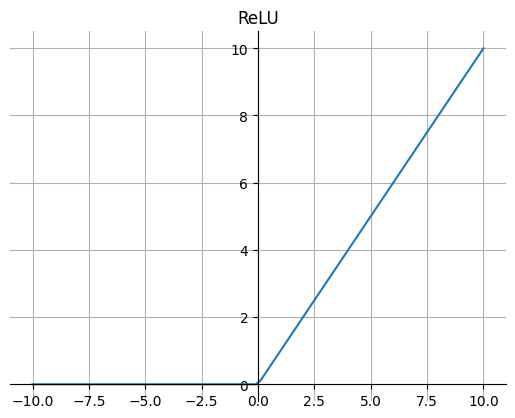

In [7]:
plot(ReLU, "ReLU")

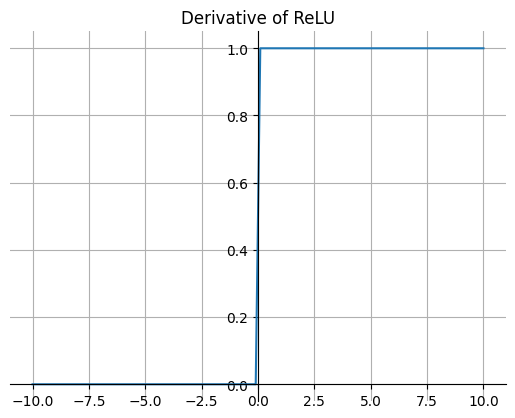

In [8]:
plot(dReLU, "Derivative of ReLU")

2. ELU
$$f(z) = \begin{cases}
x, & x\geq 0\\
\alpha(e^z-1), & x<0
\end{cases}$$

$$f'(z) = \begin{cases}
1, & x\geq 0\\
\alpha e^z, & x<0
\end{cases}$$

In [9]:
def ELU(z:np.ndarray, alpha = 1.0) -> np.ndarray:
    return (z >= 0) * z + (z < 0) * alpha * (np.exp(z) - 1)
def dELU(z:np.ndarray, alpha = 1.0) -> np.ndarray:
    return (z >= 0) * 1 + (z < 0) * alpha * np.exp(z)

In [10]:
ELU(a)

array([[ 0.22516844,  1.28830052,  1.72097271,  0.17954346,  2.05729989,
         0.74383133,  0.25645149,  0.89255684,  1.04113565],
       [-0.65184599,  0.04960024,  0.68280581,  1.51336349, -0.63082717,
        -0.42672021, -0.23348731,  1.96991883, -0.33529817],
       [ 0.69564246,  0.31596125, -0.47559821,  0.17982319,  0.20346104,
        -0.35976547,  0.98099995, -0.16059807,  0.76594539],
       [-0.82770635,  0.37988754, -0.59616257,  0.10167282,  1.12812565,
        -0.18201856,  1.25247799,  0.28353484, -0.27109151],
       [-0.54198114,  1.69365077,  1.44186307, -0.62547495, -0.54108375,
        -0.30344708, -0.41730084, -0.76907217, -0.30574183],
       [ 0.02510609,  0.67552932, -0.4864141 , -0.06491905, -0.29412236,
         0.42902067, -0.18808966,  0.54772296, -0.90016652],
       [-0.2370923 ,  0.03745434, -0.59692538,  0.98107182,  0.5174788 ,
        -0.44384698,  0.28437349,  0.97497123, -0.69972758],
       [ 0.38352568, -0.50143159,  0.46759569,  0.03450009, -0

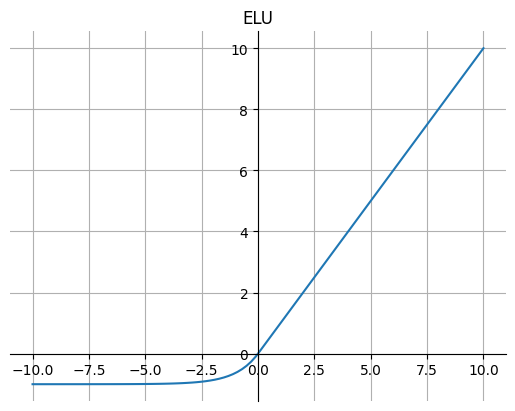

In [11]:
plot(ELU, "ELU")

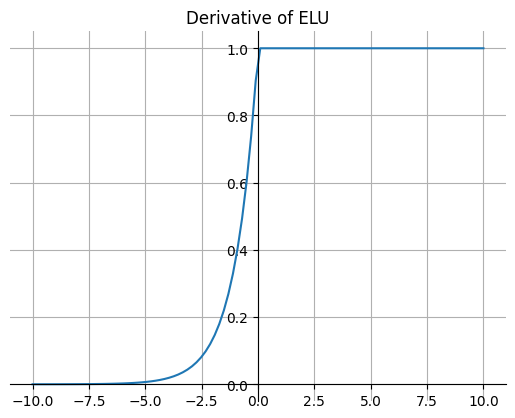

In [12]:
plot(dELU, "Derivative of ELU")

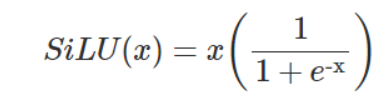

3.SiLU

$$
f(z) = z(\frac{1}{1+e^{-z}})
$$
$$
f'(z) = \dfrac{{e}^{-z}(z+1)+1}{\left({{e}^{-z}+1}\right)^{2}}
$$

In [13]:
def SiLU(z:np.ndarray) -> np.ndarray:
    return z*(1/(1+np.exp(-z)))
def dSiLU(z:np.ndarray) -> np.ndarray:
    return (np.exp(-z)*(z+1)+1)/(np.exp(-z)+1)**2

In [14]:
SiLU(a)

array([[ 0.12520614,  1.00984647,  1.45982213,  0.09780911,  1.82417316,
         0.50419349,  0.14457806,  0.63319547,  0.76947116],
       [-0.27247695,  0.02541504,  0.45363204,  1.24029088, -0.26868571,
        -0.20273711, -0.11537919,  1.72880548, -0.16307745],
       [ 0.46414722,  0.18273292, -0.22205421,  0.09797398,  0.11204406,
        -0.17405672,  0.71348772, -0.07989033,  0.52286737],
       [-0.2584573 ,  0.22559468, -0.26083983,  0.05341852,  0.85229084,
        -0.09039986,  0.97408785,  0.16173185, -0.13331303],
       [-0.24529292,  1.43063302,  1.16609665, -0.26759772, -0.24500663,
        -0.14846667, -0.19884173, -0.27496282, -0.14953017],
       [ 0.01271062,  0.44770041, -0.22610001, -0.03243517, -0.1441291 ,
         0.25983199, -0.09336775,  0.34704117, -0.20916027],
       [-0.11711148,  0.01907784, -0.26103183,  0.71355398,  0.3242305 ,
        -0.20968474,  0.16226867,  0.70793564, -0.27782431],
       [ 0.22809161, -0.23156155,  0.28748462,  0.01754758, -0

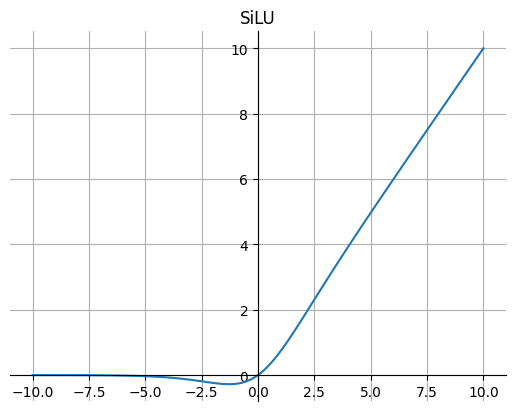

In [15]:
plot(SiLU, "SiLU")

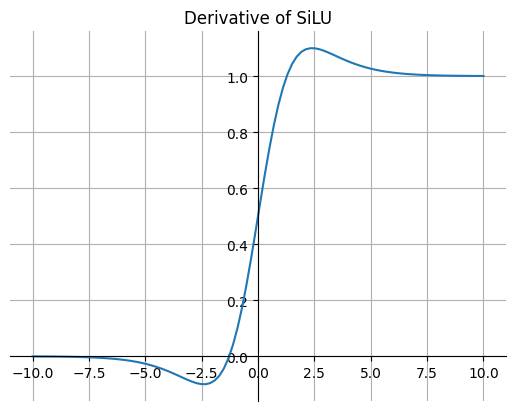

In [16]:
plot(dSiLU, "Derivative of SiLU")

4. Softplus

$$
f(z) = ln(1+e^x)
$$
$$
f'(z) = \frac{e^x}{1+e^x}
$$

In [17]:
def Softplus (z:np.ndarray) -> np.ndarray:
    return np.log(1+np.exp(z))
def dSoftplus(z:np.ndarray) -> np.ndarray:
    return np.exp(z)/(1+np.exp(z))

In [18]:
Softplus(a)

array([[0.81205566, 1.53182614, 1.88554777, 0.78694299, 2.17756746,
        1.13268552, 0.82957142, 1.23586786, 1.34349955],
       [0.29873626, 0.71825479, 1.09172994, 1.7123522 , 0.31420678,
        0.45316248, 0.56900737, 2.10048047, 0.50964603],
       [1.1002765 , 0.86355518, 0.42160207, 0.78709539, 0.80004335,
        0.49483924, 1.29940713, 0.60944048, 1.14772842],
       [0.15896221, 0.90102283, 0.33920951, 0.7452752 , 1.40851064,
        0.59772679, 1.50385576, 0.84493012, 0.54749028],
       [0.37707857, 1.86242017, 1.65413717, 0.31810825, 0.37769386,
        0.5285985 , 0.45913172, 0.20776822, 0.52724499],
       [0.70577901, 1.0869016 , 0.4144816 , 0.66014916, 0.53407973,
        0.93049055, 0.59438173, 1.00404913, 0.09515879],
       [0.56696455, 0.71204969, 0.33866598, 1.2994594 , 0.98499267,
        0.44221676, 0.84540858, 1.29502601, 0.2625738 ],
       [0.90318492, 0.40451026, 0.95403032, 0.710546  , 0.4368833 ,
        0.28394086, 0.63251759, 0.29185227, 0.49717049]])

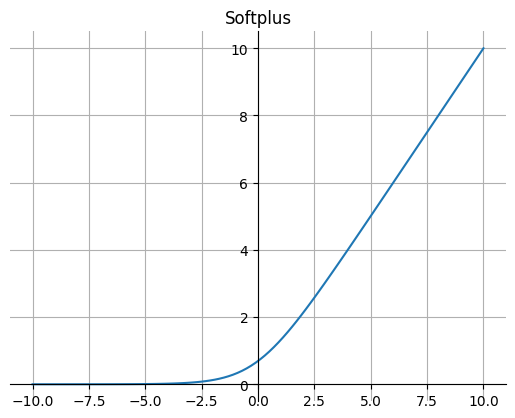

In [19]:
plot(Softplus, "Softplus")

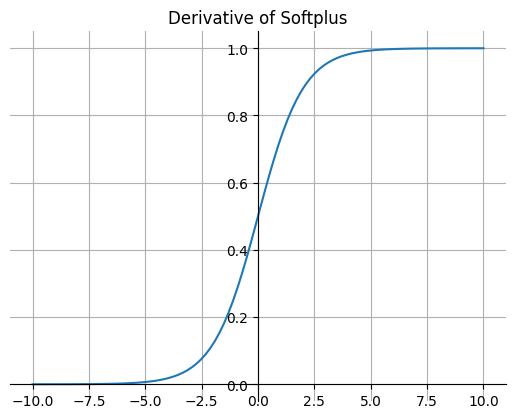

In [20]:
plot(dSoftplus, "Derivative of Softplus")

5. Mish

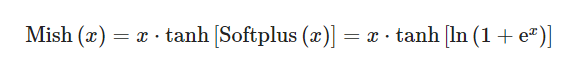

In [21]:
def Mish (z:np.ndarray) -> np.ndarray:
    return z*np.tanh(np.log(1+np.exp(z)))

def mish_derivative(x):
    omega = np.exp(3*x) + 4*np.exp(2*x) + (6+4*x)*np.exp(x) + 4*(1 + x)
    delta = 1 + pow((np.exp(x) + 1), 2)
    derivative = np.exp(x) * omega / pow(delta, 2)
    return derivative

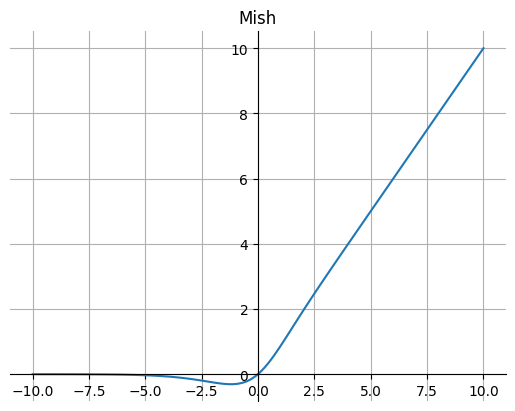

In [22]:
plot(Mish, "Mish")

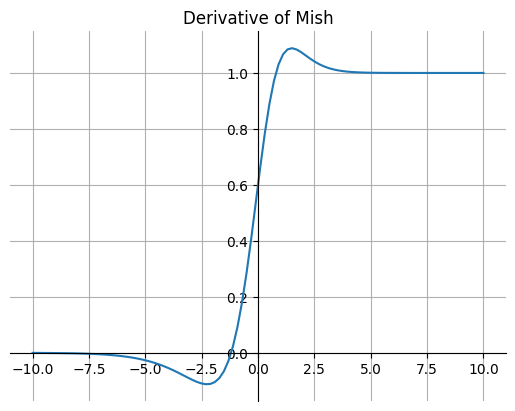

In [23]:
plot(mish_derivative, "Derivative of Mish")

## Loss function

In [89]:
a = np.random.randint(0,2,(8,3*3))
b = np.random.random((8,3*3))
c = np.random.random((8,3*3))

1. BinaryCrossEntropy

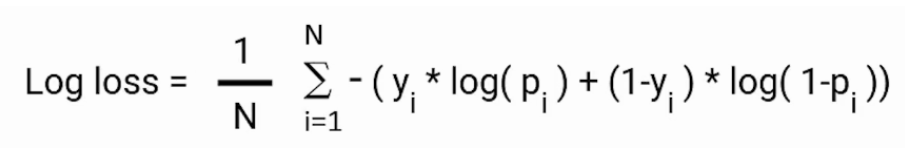

In [90]:
def BCE(y_pred,y_true):
    loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()
    return loss

In [91]:
BCE(ReLU(b),a)

1.0961314560261222

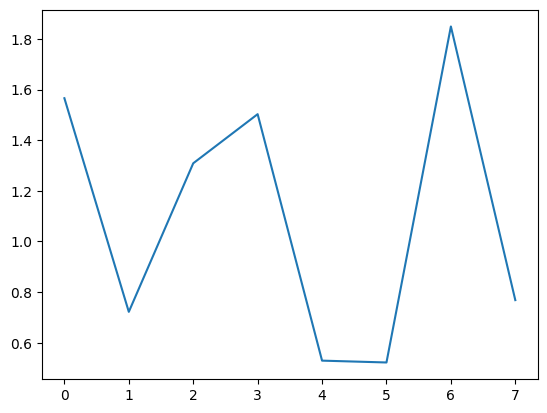

In [92]:
f = [BCE(ReLU(b[i]), a[i]) for i in range(a.shape[0])]
plt.plot(f)

2. Kullback-Leibler divergence loss

The Kullback-Leibler (KL) divergence loss is typically used in probabilistic models to measure the difference between two probability distributions

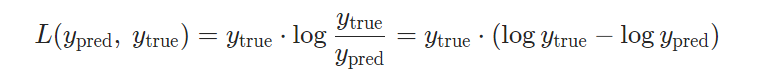

In [93]:
def KLDivLoss(y_pred, y_true):
    return (y_true*(np.log(y_true+1e-6)-np.log(y_pred))).sum()

In [94]:
KLDivLoss(c,b)

23.610251740329616

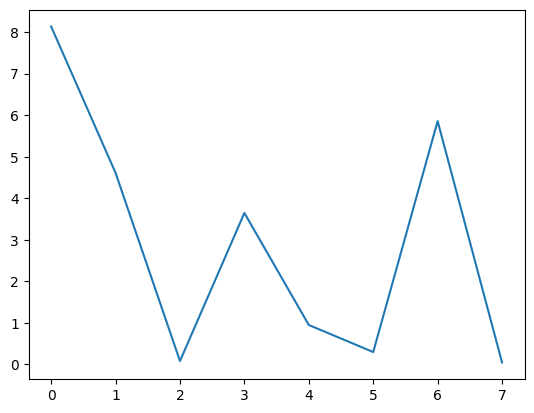

In [95]:
f = [KLDivLoss(c[i], b[i]) for i in range(a.shape[0])]
plt.plot(f)

3. Huber loss

Huber Loss or Smooth Mean Absolute Error is a loss function that takes the advantageous characteristics of the Mean Absolute Error and Mean Squared Error loss functions and combines them into a single loss function

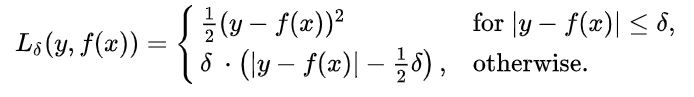

In [100]:
def MSE(y_pred, y_true):
    return ((y_true-y_pred)**2).mean()

In [101]:
a1 = np.random.random((8,9))*1000
b1 = np.random.random((8,9))*1000

MSE(a1,b1)

165062.12866208042

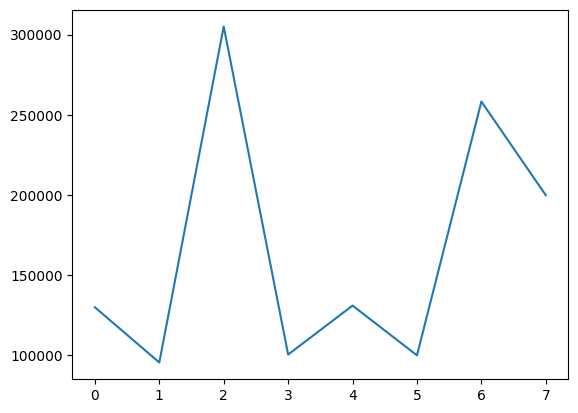

In [102]:
f = [MSE(a1[i], b1[i]) for i in range(a.shape[0])]
plt.plot(f)